# AMEX Credit Risk

#### 📘 Project Overview: AMEX Credit Risk Prediction
This project addresses the American Express Credit Risk Modeling Challenge, where the objective is to predict customer credit risk — specifically, whether a customer will default in the near future — using a large historical dataset provided by AMEX.

🎯 Objective:
To build a reliable model that can:

Analyze and transform customer transaction history

Predict the binary target variable (target = 1 if the customer defaulted)

## Prepping the data

In [26]:
# Importing the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file path for train_data
file_path = 'D:/train_data.csv'

# Use Pandas' read_csv with chunksize to read the file in chunks

train_labels_all = pd.read_csv('D:/train_labels.csv')
train_labels = train_labels_all .sample(frac=0.2, random_state=42)  


merged_data = pd.DataFrame()
for chunk_train_data in pd.read_csv(file_path, chunksize=100000):
    # Merge each chunk with train_labels
    merged_chunk = pd.merge(train_labels, chunk_train_data, on='customer_ID', how='inner')
    
    # Append the merged chunk to the result DataFrame
    merged_data = pd.concat([merged_data, merged_chunk])
    print(merged_data)



                                             customer_ID  target         S_2  \
0      000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-03-20   
1      000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-04-19   
2      000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-05-20   
3      000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-06-19   
4      000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-07-20   
...                                                  ...     ...         ...   
20069  01fc75170c710bf29421a234b3f43794bde4bf1a6f71da...       0  2017-11-15   
20070  01fc75170c710bf29421a234b3f43794bde4bf1a6f71da...       0  2017-12-19   
20071  01fc75170c710bf29421a234b3f43794bde4bf1a6f71da...       0  2018-01-16   
20072  01fc75170c710bf29421a234b3f43794bde4bf1a6f71da...       0  2018-02-13   
20073  01fc75170c710bf29421a234b3f43794bde4bf1a6f71da...       0  2018-03-10   

            P_2      D_39       B_1    

In [28]:
merged_data.shape

(1107082, 191)

### Initial Data visualisation

In [30]:

slide_2 = merged_data.copy() 

obs =  slide_2.groupby('customer_ID').count()

slide_2 = obs.groupby(["target"]).size()



In [33]:
# counting the number of variables
S = sum(column.startswith('S') for column in merged_data.columns)
D = sum(column.startswith('D') for column in merged_data.columns)
P = sum(column.startswith('P') for column in merged_data.columns)
B = sum(column.startswith('B') for column in merged_data.columns)
R = sum(column.startswith('R') for column in merged_data.columns)

slide_3 = pd.DataFrame({'Variable Type': ['Spend', 'Delinquency','Payment',
                                            'Balance','Risk','Total'], 'Count': [S,D,P,B,R, 
                                                                                 S+D+P+B+R]})


sorted_data = merged_data.sort_values(by= 'S_2',ascending = False)


### One Hot Encoding

In [35]:

one_hot_encoded_data = pd.get_dummies(merged_data, columns = ['D_63', 'D_64'])
print(one_hot_encoded_data)



# counting the number of variables
S = sum(column.startswith('S') for column in one_hot_encoded_data.columns)
D = sum(column.startswith('D') for column in one_hot_encoded_data.columns)
P = sum(column.startswith('P') for column in one_hot_encoded_data.columns)
B = sum(column.startswith('B') for column in one_hot_encoded_data.columns)
R = sum(column.startswith('R') for column in one_hot_encoded_data.columns)

one_hot_summary = pd.DataFrame({'Variable Type': ['Spend', 'Delinquency','Payment',
                                            'Balance','Risk','Total'], 'Count': [S,D,P,B,R, 
                                                                                 S+D+P+B+R]})





                                            customer_ID  target         S_2  \
0     000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-03-20   
1     000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-04-19   
2     000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-05-20   
3     000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-06-19   
4     000f8675ede66cc6affd4c048db11a00246d7ee623f453...       0  2017-07-20   
...                                                 ...     ...         ...   
6324  ff4635c255ba7f62715b51de3a9f85a3032f211c7118a3...       0  2017-11-15   
6325  ff4635c255ba7f62715b51de3a9f85a3032f211c7118a3...       0  2017-12-27   
6326  ff4635c255ba7f62715b51de3a9f85a3032f211c7118a3...       0  2018-01-14   
6327  ff4635c255ba7f62715b51de3a9f85a3032f211c7118a3...       0  2018-02-18   
6328  ff4635c255ba7f62715b51de3a9f85a3032f211c7118a3...       0  2018-03-03   

           P_2      D_39       B_1       B_2       

### Cleaning the Data

In [37]:
# Step 1: Select unique 'customer_ID' and 'target' pairs
target = one_hot_encoded_data[['customer_ID', 'target']].drop_duplicates()

# Step 2: Drop 'S_2' and 'target' columns, then calculate mean for each 'customer_ID'
# Use the mean() function after grouping to avoid the extra 'agg' syntax complexity
merged_data_nc = one_hot_encoded_data.drop(['S_2', 'target'], axis=1)
merged_data_nc = merged_data_nc.groupby('customer_ID').mean().reset_index()

# Step 3: Merge with the target data using an inner join on 'customer_ID'
merged_data = pd.merge(merged_data_nc, target, on='customer_ID', how='inner')

# Step 4: Drop 'customer_ID' column from the final merged data
final_data = merged_data.drop(columns=['customer_ID'])

# Display the shape or preview of the final data to verify the result
print(final_data.shape)
final_data.head()


(91783, 197)


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U,target
0,0.444606,0.010394,0.070828,0.247854,0.003958,0.357354,0.005414,0.127152,0.142407,0.080426,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.846154,0.000000,0
1,0.972260,0.005031,0.005157,0.816084,0.003508,0.171883,0.005562,0.006415,NaN,0.013120,...,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0
2,0.665203,0.450042,0.494706,0.047334,0.048791,0.379823,0.005174,0.289680,NaN,0.092329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0
3,0.970309,0.367651,0.040324,1.006227,0.044113,0.107196,0.005557,0.005767,NaN,0.062928,...,0.0,1.0,0.0,0.0,0.0,0.0,0.461538,0.000000,0.538462,0
4,0.953131,0.219669,0.032479,0.820899,0.005651,0.018259,0.118203,0.004899,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0


In [39]:
final_data

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U,target
0,0.444606,0.010394,0.070828,0.247854,0.003958,0.357354,0.005414,0.127152,0.142407,0.080426,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.846154,0.000000,0
1,0.972260,0.005031,0.005157,0.816084,0.003508,0.171883,0.005562,0.006415,NaN,0.013120,...,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0
2,0.665203,0.450042,0.494706,0.047334,0.048791,0.379823,0.005174,0.289680,NaN,0.092329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0
3,0.970309,0.367651,0.040324,1.006227,0.044113,0.107196,0.005557,0.005767,NaN,0.062928,...,0.0,1.0,0.0,0.0,0.0,0.0,0.461538,0.000000,0.538462,0
4,0.953131,0.219669,0.032479,0.820899,0.005651,0.018259,0.118203,0.004899,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91778,0.513501,0.228928,0.895741,0.316005,0.067015,0.955474,0.004115,0.159526,0.077539,0.287972,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.000000,1
91779,0.859327,0.066421,0.368335,0.042358,0.005542,0.273668,0.005306,0.271978,NaN,0.327520,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0
91780,0.786838,0.221548,0.043031,0.854813,0.004751,0.084385,0.182801,0.057544,NaN,0.121265,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0
91781,0.804454,0.030878,0.018161,0.675695,0.023470,0.357946,0.004919,0.071122,NaN,0.095588,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.461538,0.538462,1


## XGBOOST Model With Default Parameters

In [41]:


from sklearn.model_selection import train_test_split
import xgboost as xgb

train, test = train_test_split(final_data, test_size=0.15, random_state=42)

# Further split the temp test set into Test1 and Test2 (50% each)
test1, test2 = train_test_split(test, test_size=0.5, random_state=42)


#running the xgboost model with default parameters

X_train = train.drop(['target'], axis=1)
Y_train = train['target']

X_test1 = test1.drop(['target'], axis=1)
Y_test1 = test1['target']

X_test2 = test2.drop(['target'], axis=1)
Y_test2 = test2['target']

xgb_instance = xgb.XGBClassifier()

# Fit the model to your training data
model_for_feature_selection = xgb_instance.fit(X_train, Y_train)

# Extracting feature importances
feature_importance = {
    'Feature': X_train.columns,
    'Importance': model_for_feature_selection.feature_importances_
}

# Create a DataFrame from the dictionary
feature_importance_df = pd.DataFrame(feature_importance)

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values("Importance", inplace=True, ascending=False)

# Print the sorted feature importances
print(feature_importance_df.to_string(index=False))

# Choose features with importance higher than 1%
final_features = feature_importance_df["Feature"][feature_importance_df.Importance > 0.005]

X_train = X_train[final_features]
X_test1 = test1[final_features]
X_test2 = test2[final_features]

Feature  Importance
    P_2    0.285704
    R_1    0.054427
    B_1    0.053767
    S_3    0.013212
   D_42    0.012122
   D_65    0.011216
   D_44    0.010784
    B_7    0.009952
   B_30    0.009449
    R_3    0.009009
    B_3    0.008734
   B_22    0.008477
   B_11    0.008398
  D_111    0.007700
   D_45    0.007591
    B_2    0.007561
   D_66    0.007238
   D_46    0.006904
    P_3    0.006530
   B_17    0.006439
   D_50    0.006139
  D_132    0.005977
    R_2    0.005905
    B_9    0.005874
    B_4    0.005697
  D_120    0.005470
   D_54    0.005389
   D_43    0.005276
   D_49    0.005270
   B_23    0.005186
 D_64_O    0.004931
   D_56    0.004849
   S_23    0.004557
    B_5    0.004527
   B_26    0.004484
   S_25    0.004380
   B_37    0.004186
  D_112    0.004159
D_63_XM    0.004141
    S_8    0.004041
   D_39    0.004035
  D_110    0.004035
   R_11    0.004015
   S_15    0.003936
   B_38    0.003870
   D_51    0.003623
   R_16    0.003532
    R_5    0.003463
    R_7    0.003327


### XGBOOST MODEL with Some Parameters

In [43]:


X_train = train.drop(['target'], axis=1)
Y_train = train['target']

X_test1 = test1.drop(['target'], axis=1)
Y_test1 = test1['target']

X_test2 = test2.drop(['target'], axis=1)
Y_test2 = test2['target']

xgb_instance = xgb.XGBClassifier(n_estimators=300,
                                   learning_rate = 0.5,
                                   max_depth =4,
                                   subsample = 0.5,
                                   colsample_bytree = 0.5,
                                   scale_pos_weight = 5

                                   )

# Fit the model to your training data
model_for_feature_selection_N = xgb_instance.fit(X_train, Y_train)

# Extracting feature importances
feature_importance= {
    'Feature': X_train.columns,
    'Importance': model_for_feature_selection.feature_importances_
}

# Create a DataFrame from the dictionary
feature_importance_df= pd.DataFrame(feature_importance)

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values("Importance", inplace=True, ascending=False)

# Print the sorted feature importances
print(feature_importance_df.to_string(index=False))

# Choose features with importance higher than 1%
final_features= feature_importance_df["Feature"][feature_importance_df.Importance > 0.005]

X_train = X_train[final_features]
X_test1 = test1[final_features]
X_test2 = test2[final_features]


Feature  Importance
    P_2    0.285704
    R_1    0.054427
    B_1    0.053767
    S_3    0.013212
   D_42    0.012122
   D_65    0.011216
   D_44    0.010784
    B_7    0.009952
   B_30    0.009449
    R_3    0.009009
    B_3    0.008734
   B_22    0.008477
   B_11    0.008398
  D_111    0.007700
   D_45    0.007591
    B_2    0.007561
   D_66    0.007238
   D_46    0.006904
    P_3    0.006530
   B_17    0.006439
   D_50    0.006139
  D_132    0.005977
    R_2    0.005905
    B_9    0.005874
    B_4    0.005697
  D_120    0.005470
   D_54    0.005389
   D_43    0.005276
   D_49    0.005270
   B_23    0.005186
 D_64_O    0.004931
   D_56    0.004849
   S_23    0.004557
    B_5    0.004527
   B_26    0.004484
   S_25    0.004380
   B_37    0.004186
  D_112    0.004159
D_63_XM    0.004141
    S_8    0.004041
   D_39    0.004035
  D_110    0.004035
   R_11    0.004015
   S_15    0.003936
   B_38    0.003870
   D_51    0.003623
   R_16    0.003532
    R_5    0.003463
    R_7    0.003327


### XGBOOST GRID SEARCH 

In [45]:


# Here we do grid search only on #trees, and look at the AUC as performance metric.
from sklearn.metrics import roc_auc_score

table = pd.DataFrame(columns=["Num Trees", "Learning Rate", "Subsample", "Colsample_bytree",
                              "Weight_of_Default", "AUC Train", "AUC Test1", "AUC Test2"])

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1],
    'scale_pos_weight': [1, 5, 10]  # Corrected parameter name here
}

row = 0
for num_trees in param_grid['n_estimators']:
    for LR in param_grid['learning_rate']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for weight_of_default in param_grid['scale_pos_weight']:
                    xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate=LR,
                                                     subsample=subsample, colsample_bytree=colsample_bytree,
                                                     scale_pos_weight=weight_of_default  # Corrected parameter name here
                                                     )
                    model = xgb_instance.fit(X_train, Y_train)

                    table.loc[row, "Num Trees"] = num_trees
                    table.loc[row, "Learning Rate"] = LR
                    table.loc[row, "Subsample"] = subsample
                    table.loc[row, "Colsample_bytree"] = colsample_bytree
                    table.loc[row, "Weight_of_Default"] = weight_of_default  # Corrected parameter name here
                    table.loc[row, "AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
                    table.loc[row, "AUC Test1"] = roc_auc_score(test1['target'], model.predict_proba(X_test1)[:, 1])
                    table.loc[row, "AUC Test2"] = roc_auc_score(test2['target'], model.predict_proba(X_test2)[:, 1])
                    row += 1
                    
                    print(table)






  Num Trees Learning Rate Subsample Colsample_bytree Weight_of_Default  \
0        50          0.01       0.5              0.5                 1   

  AUC Train AUC Test1 AUC Test2  
0  0.946447  0.946035  0.935724  
  Num Trees Learning Rate Subsample Colsample_bytree Weight_of_Default  \
0        50          0.01       0.5              0.5                 1   
1        50          0.01       0.5              0.5                 5   

  AUC Train AUC Test1 AUC Test2  
0  0.946447  0.946035  0.935724  
1  0.944451   0.94415  0.933803  
  Num Trees Learning Rate Subsample Colsample_bytree Weight_of_Default  \
0        50          0.01       0.5              0.5                 1   
1        50          0.01       0.5              0.5                 5   
2        50          0.01       0.5              0.5                10   

  AUC Train AUC Test1 AUC Test2  
0  0.946447  0.946035  0.935724  
1  0.944451   0.94415  0.933803  
2   0.94358  0.943437  0.933209  
  Num Trees Learning Rate

In [47]:

table['Variance'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].var(axis=1)
table.to_csv('D:/xgboost_Results.csv')


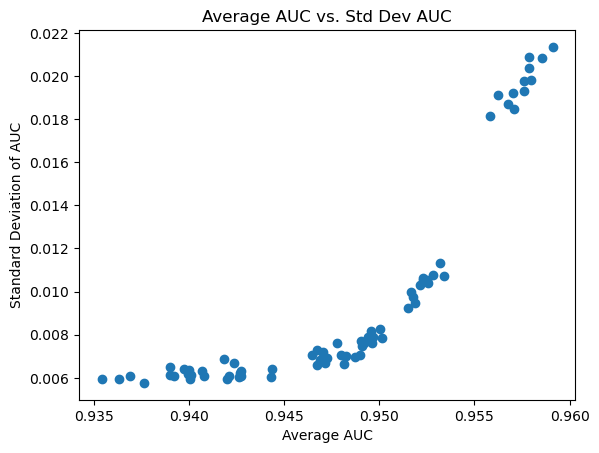

In [49]:
table['Average AUC'] = (table['AUC Train'] + table['AUC Test1'] + table['AUC Test2']) / 3

 

table['Std Dev AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

 

plt.scatter(table['Average AUC'], table['Std Dev AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Std Dev AUC')
plt.show()

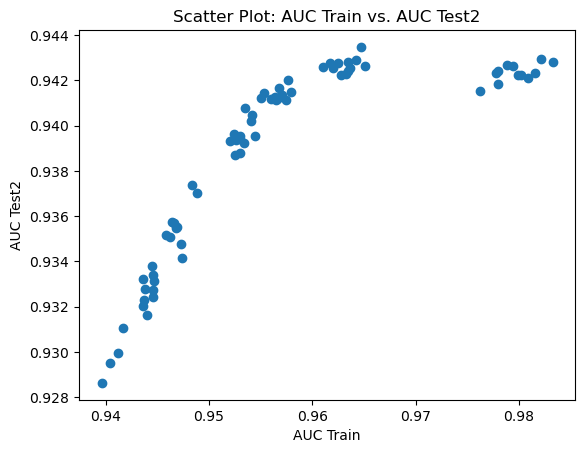

In [51]:
plt.scatter(table['AUC Train'],table['AUC Test2'])
plt.xlabel('AUC Train')
plt.ylabel('AUC Test2')
plt.title('Scatter Plot: AUC Train vs. AUC Test2')
plt.show()

### XGBOOST Final Model

In [53]:
# Define and configure the XGBoost model
xgb_instance_OP = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.5,
    scale_pos_weight=1
)

# Fit the model to the training data
model_for_feature_selection_OP = xgb_instance_OP.fit(X_train, Y_train)

# Extract feature importances
feature_importance_OP = {
    'Feature': X_train.columns,
    'Importance': model_for_feature_selection_OP.feature_importances_
}

# Create a DataFrame from the dictionary and sort by importance
feature_importance_df_OP = pd.DataFrame(feature_importance_OP)
feature_importance_df_OP.sort_values("Importance", inplace=True, ascending=False)

# Print the sorted feature importances
print(feature_importance_df_OP.to_string(index=False))

# Select features with importance higher than a threshold (e.g., 0.005)
final_features_OP = feature_importance_df_OP["Feature"][feature_importance_df_OP.Importance > 0.005].tolist()

# Filter training and test sets to keep only the selected features
X_train_OP = X_train[final_features_OP]
X_test1_OP = X_test1[final_features_OP]
X_test2_OP = X_test2[final_features_OP]


Feature  Importance
    P_2    0.185456
    R_1    0.096792
    B_9    0.078373
   D_44    0.054365
   D_42    0.042827
    B_1    0.030488
   B_23    0.029165
    S_3    0.027458
   D_65    0.025981
    B_7    0.024102
    B_2    0.023779
   D_50    0.023403
   B_30    0.022518
  D_111    0.022375
    R_2    0.021913
   B_11    0.021240
   D_54    0.020782
    B_4    0.020757
   D_46    0.020662
   D_66    0.020294
   D_45    0.020225
  D_120    0.020012
    P_3    0.019926
   D_43    0.019511
   B_22    0.019347
   D_49    0.019246
   B_17    0.018800
    R_3    0.018341
  D_132    0.016946
    B_3    0.014917


In [55]:
X_test2

,P_2,R_1,B_1,S_3,D_42,D_65,D_44,B_7,B_30,R_3,...,D_50,D_132,R_2,B_9,B_4,D_120,D_54,D_43,D_49,B_23
75901,0.504768,0.041363,0.514887,0.526540,NaN,0.005005,0.360627,0.381229,0.923077,0.275599,...,NaN,0.246089,0.004533,0.577593,0.484278,0.0,1.005422,0.318817,0.247358,0.367941
80732,0.555884,0.043833,0.006719,NaN,NaN,0.005026,0.062427,0.032772,0.000000,0.096954,...,NaN,NaN,0.004248,0.004856,0.029887,0.0,1.005522,0.072785,NaN,0.022642
52245,0.980254,0.005205,0.028769,0.133210,NaN,0.004448,0.005324,0.027511,0.000000,0.003529,...,0.071529,NaN,0.005863,0.039034,0.016924,0.0,1.004682,NaN,NaN,0.015583
82445,0.945530,0.003561,0.005567,NaN,NaN,0.005534,0.005478,0.027973,0.000000,0.043548,...,NaN,NaN,0.006214,0.004804,0.046098,0.0,1.005467,0.056290,NaN,0.019898
44062,0.949658,0.004155,0.066198,0.144479,0.012050,0.006350,0.004007,0.223265,0.000000,0.027278,...,NaN,NaN,0.005399,0.049765,0.247401,0.0,1.005448,NaN,NaN,0.193342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38530,0.414356,0.004918,0.235061,0.123562,0.076508,0.003271,0.255156,0.875070,0.500000,0.204220,...,0.116814,NaN,0.003101,0.273309,0.311178,1.0,1.005709,NaN,NaN,0.836815
68675,0.346555,0.005409,1.040595,0.120351,0.226538,0.004928,0.370403,0.665555,1.000000,0.111214,...,NaN,0.209461,0.005559,0.598397,0.701550,0.0,1.005941,0.130129,0.086009,0.640611
13535,0.446256,0.255063,0.037659,0.079020,0.020857,0.004180,0.005568,0.034175,0.000000,0.105101,...,NaN,NaN,0.004022,0.493762,0.013613,0.0,1.005329,NaN,NaN,0.020624
38395,0.850976,0.024342,0.105976,0.124695,NaN,0.005261,0.033873,0.044016,0.153846,0.003843,...,0.079655,NaN,0.004137,0.133028,0.107989,0.0,1.003611,0.034322,NaN,0.033155


In [57]:
#Neural Network
#Step 13
#feature engineering

from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your feature matrices with selected features
# Replace missing values with 0
X_train.fillna(0, inplace=True)
X_test1.fillna(0, inplace=True)
X_test2.fillna(0, inplace=True)


# Capping and flooring at the 1st and 99th percentiles
for col in X_train.columns:
    p1 = X_train[col].quantile(0.01)
    p99 = X_train[col].quantile(0.99)
    X_train[col] = X_train[col].clip(p1, p99)
    X_test1[col] = X_test1[col].clip(p1, p99)
    X_test2[col] = X_test2[col].clip(p1, p99)

# Standardization using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test1)
X_test2 = scaler.transform(X_test2)

#checking for null values
pd.DataFrame(X_test1).isnull().sum()
pd.DataFrame(X_train).isnull().sum()
pd.DataFrame(X_test2).isnull().sum()


C:\Users\Sudha\AppData\Local\Temp\ipykernel_25120\4254533825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
C:\Users\Sudha\AppData\Local\Temp\ipykernel_25120\4254533825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test1.fillna(0, inplace=True)
C:\Users\Sudha\AppData\Local\Temp\ipykernel_25120\4254533825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test2.fillna(0, inplace=True)
C:

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [59]:

from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
import pandas as pd

# Define hyperparameters
num_hidden_layers = [2, 4]
num_nodes = [4, 6]
activation_funcs = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]
batch_sizes = [100, 10000]
num_epochs = 20

# Create empty DataFrame to store results
results_df = pd.DataFrame(columns=['# HL', '#Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# Iterate through all combinations of hyperparameters
for hl in num_hidden_layers:
    for nn in num_nodes:
        for af in activation_funcs:
            for dr in dropout_rates:
                for bs in batch_sizes:
                    
                    # Build neural network model
                    model = Sequential()
                    model.add(Dense(nn, activation=af, input_shape=(X_train.shape[1],)))
                    for i in range(hl - 1):
                        model.add(Dense(nn, activation=af))
                        if dr < 1.0:
                            model.add(Dropout(dr))
                    model.add(Dense(1, activation='sigmoid'))
                    model.compile(loss='binary_crossentropy', optimizer='adam')
                    
                    # Train model
                    model.fit(X_train, Y_train, batch_size=bs, epochs=num_epochs, verbose=0)
                    
                    # Evaluate performance on train and test sets
                    y_pred_train = model.predict(X_train).ravel()
                    y_pred_test1 = model.predict(X_test1).ravel()
                    y_pred_test2 = model.predict(X_test2).ravel()
                    auc_train = roc_auc_score(Y_train, y_pred_train)
                    auc_test1 = roc_auc_score(Y_test1, y_pred_test1)
                    auc_test2 = roc_auc_score(Y_test2, y_pred_test2)
                    
                    # Create a DataFrame with the new row and concatenate it to results_df
                    new_row = pd.DataFrame({
                        '# HL': [hl],
                        '#Node': [nn],
                        'Activation Function': [af],
                        'Dropout': [dr],
                        'Batch Size': [bs],
                        'AUC Train': [auc_train],
                        'AUC Test 1': [auc_test1],
                        'AUC Test 2': [auc_test2]
                    })
                    
                    results_df = pd.concat([results_df, new_row], ignore_index=True)
                    print(results_df.iloc[-1])


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
# HL                          2
#Node                         4
Activation Function        relu
Dropout                     0.5
Batch Size                  100
AUC Train              0.944449
AUC Test 1             0.946715
AUC Test 2               0.9368
Name: 0, dtype: object


C:\Users\Sudha\AppData\Local\Temp\ipykernel_25120\3669284120.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)
D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
# HL                          2
#Node                         4
Activation Function        relu
Dropout                     0.5
Batch Size                10000
AUC Train              0.897954
AUC Test 1             0.900871
AUC Test 2             0.888983
Name: 1, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
# HL                          2
#Node                         4
Activation Function        relu
Dropout                     1.0
Batch Size                  100
AUC Train              0.944508
AUC Test 1             0.947367
AUC Test 2             0.936735
Name: 2, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
# HL                          2
#Node                         4
Activation Function        relu
Dropout                     1.0
Batch Size                10000
AUC Train              0.923733
AUC Test 1             0.931019
AUC Test 2             0.914377
Name: 3, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
# HL                          2
#Node                         4
Activation Function        tanh
Dropout                     0.5
Batch Size                  100
AUC Train              0.944564
AUC Test 1             0.947006
AUC Test 2             0.936787
Name: 4, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
# HL                          2
#Node                         4
Activation Function        tanh
Dropout                     0.5
Batch Size                10000
AUC Train              0.899016
AUC Test 1             0.904911
AUC Test 2             0.883124
Name: 5, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
# HL                          2
#Node                         4
Activation Function        tanh
Dropout                     1.0
Batch Size                  100
AUC Train              0.945378
AUC Test 1               0.9482
AUC Test 2             0.938759
Name: 6, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
# HL                          2
#Node                         4
Activation Function        tanh
Dropout                     1.0
Batch Size                10000
AUC Train              0.891888
AUC Test 1             0.900684
AUC Test 2             0.884487
Name: 7, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
# HL                          2
#Node                         6
Activation Function        relu
Dropout                     0.5
Batch Size                  100
AUC Train              0.945387
AUC Test 1             0.947711
AUC Test 2             0.936862
Name: 8, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
# HL                          2
#Node                         6
Activation Function        relu
Dropout                     0.5
Batch Size                10000
AUC Train              0.918051
AUC Test 1             0.925625
AUC Test 2             0.907926
Name: 9, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
# HL                          2
#Node                         6
Activation Function        relu
Dropout                     1.0
Batch Size                  100
AUC Train              0.945572
AUC Test 1             0.947033
AUC Test 2             0.937944
Name: 10, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
# HL                          2
#Node                         6
Activation Function        relu
Dropout                     1.0
Batch Size                10000
AUC Train              0.915417
AUC Test 1             0.918753
AUC Test 2             0.908554
Name: 11, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
# HL                          2
#Node                         6
Activation Function        tanh
Dropout                     0.5
Batch Size                  100
AUC Train              0.945832
AUC Test 1              0.94756
AUC Test 2             0.938872
Name: 12, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
# HL                          2
#Node                         6
Activation Function        tanh
Dropout                     0.5
Batch Size                10000
AUC Train              0.933417
AUC Test 1             0.936388
AUC Test 2             0.926103
Name: 13, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
# HL                          2
#Node                         6
Activation Function        tanh
Dropout                     1.0
Batch Size                  100
AUC Train              0.946127
AUC Test 1             0.949009
AUC Test 2             0.938996
Name: 14, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
# HL                          2
#Node                         6
Activation Function        tanh
Dropout                     1.0
Batch Size                10000
AUC Train               0.92913
AUC Test 1             0.933101
AUC Test 2             0.922456
Name: 15, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
# HL                          4
#Node                         4
Activation Function        relu
Dropout                     0.5
Batch Size                  100
AUC Train              0.943463
AUC Test 1             0.945913
AUC Test 2             0.935573
Name: 16, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
# HL                          4
#Node                         4
Activation Function        relu
Dropout                     0.5
Batch Size                10000
AUC Train              0.749815
AUC Test 1             0.759718
AUC Test 2             0.743681
Name: 17, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
# HL                          4
#Node                         4
Activation Function        relu
Dropout                     1.0
Batch Size                  100
AUC Train              0.945306
AUC Test 1             0.947296
AUC Test 2             0.938359
Name: 18, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
# HL                          4
#Node                         4
Activation Function        relu
Dropout                     1.0
Batch Size                10000
AUC Train              0.908862
AUC Test 1             0.914838
AUC Test 2              0.90513
Name: 19, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 2s 514us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
# HL                          4
#Node                         4
Activation Function        tanh
Dropout                     0.5
Batch Size                  100
AUC Train              0.943542
AUC Test 1             0.945647
AUC Test 2             0.936501
Name: 20, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
# HL                          4
#Node                         4
Activation Function        tanh
Dropout                     0.5
Batch Size                10000
AUC Train              0.888485
AUC Test 1             0.902278
AUC Test 2             0.884219
Name: 21, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
# HL                          4
#Node                         4
Activation Function        tanh
Dropout                     1.0
Batch Size                  100
AUC Train              0.945286
AUC Test 1             0.947627
AUC Test 2             0.938126
Name: 22, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
# HL                          4
#Node                         4
Activation Function        tanh
Dropout                     1.0
Batch Size                10000
AUC Train              0.915954
AUC Test 1             0.923971
AUC Test 2             0.910506
Name: 23, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
# HL                          4
#Node                         6
Activation Function        relu
Dropout                     0.5
Batch Size                  100
AUC Train              0.934276
AUC Test 1             0.934323
AUC Test 2             0.924774
Name: 24, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
# HL                          4
#Node                         6
Activation Function        relu
Dropout                     0.5
Batch Size                10000
AUC Train              0.888083
AUC Test 1             0.892856
AUC Test 2             0.883646
Name: 25, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
# HL                          4
#Node                         6
Activation Function        relu
Dropout                     1.0
Batch Size                  100
AUC Train              0.945233
AUC Test 1             0.947025
AUC Test 2             0.937947
Name: 26, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
# HL                          4
#Node                         6
Activation Function        relu
Dropout                     1.0
Batch Size                10000
AUC Train              0.930798
AUC Test 1             0.934345
AUC Test 2             0.923421
Name: 27, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
# HL                          4
#Node                         6
Activation Function        tanh
Dropout                     0.5
Batch Size                  100
AUC Train              0.944297
AUC Test 1             0.947205
AUC Test 2              0.93794
Name: 28, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 2s 612us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
# HL                          4
#Node                         6
Activation Function        tanh
Dropout                     0.5
Batch Size                10000
AUC Train              0.915829
AUC Test 1             0.921799
AUC Test 2             0.910427
Name: 29, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
# HL                          4
#Node                         6
Activation Function        tanh
Dropout                     1.0
Batch Size                  100
AUC Train              0.946503
AUC Test 1             0.948047
AUC Test 2             0.938657
Name: 30, dtype: object


D:\Python\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
# HL                          4
#Node                         6
Activation Function        tanh
Dropout                     1.0
Batch Size                10000
AUC Train              0.930137
AUC Test 1             0.932165
AUC Test 2             0.922305
Name: 31, dtype: object


### Choose the optimal neural network model

In [60]:

results_df['Variance'] = results_df[['AUC Train', 'AUC Test 1', 'AUC Test 2']].var(axis=1)
results_df.to_csv('D:/NN_Results.csv')


In [61]:
results_df

,# HL,#Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2,Variance
0,2,4,relu,0.5,100,0.944449,0.946715,0.936800,0.000027
1,2,4,relu,0.5,10000,0.897954,0.900871,0.888983,0.000038
2,2,4,relu,1.0,100,0.944508,0.947367,0.936735,0.000030
3,2,4,relu,1.0,10000,0.923733,0.931019,0.914377,0.000070
4,2,4,tanh,0.5,100,0.944564,0.947006,0.936787,0.000028
5,2,4,tanh,0.5,10000,0.899016,0.904911,0.883124,0.000127
6,2,4,tanh,1.0,100,0.945378,0.948200,0.938759,0.000023
7,2,4,tanh,1.0,10000,0.891888,0.900684,0.884487,0.000066
8,2,6,relu,0.5,100,0.945387,0.947711,0.936862,0.000033
9,2,6,relu,0.5,10000,0.918051,0.925625,0.907926,0.000079


# Final Strategy

In [62]:
# Define the XGBoost model
xgb_instance = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.5,
    scale_pos_weight=1
)

# Fit the model to the training data
final_model = xgb_instance.fit(X_train, Y_train)

# Predicting the probabilities
train['Probability of Default'] = final_model.predict_proba(X_train)[:, 1]
test1['Probability of Default'] = final_model.predict_proba(X_test1)[:, 1]
test2['Probability of Default'] = final_model.predict_proba(X_test2)[:, 1]

# Thresholds for evaluation
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Function to calculate default rate and revenue
def calculate_default_rate_and_revenue(data, target_variable, model_output, balance_variable, spend_variable, threshold):
    # Filter data based on the threshold
    filtered_data = data[data[model_output] <= threshold]

    # Calculate default rate
    total_loans = filtered_data.shape[0]
    default_rate = filtered_data[target_variable].mean()

    # Calculate revenue
    revenue = (0.02 * filtered_data[balance_variable] + 0.001 * filtered_data[spend_variable]).sum()

    return total_loans, default_rate, revenue

# Finding threshold on train data
results = []
for threshold in thresholds:
    total_loans, default_rate, revenue = calculate_default_rate_and_revenue(
        train, 'target', 'Probability of Default', 'B_17', 'S_3', threshold
    )
    results.append({'Threshold': threshold, 'Total Loans': total_loans, 'Default Rate': default_rate, 'Revenue': revenue})

# Create a DataFrame from the results
results_df_train = pd.DataFrame(results)

# Print and save the DataFrame
print(results_df_train)
results_df_train.to_csv('D:/train_results.csv', index=False)


   Threshold  Total Loans  Default Rate     Revenue
0        0.1        45835      0.005716  146.359415
1        0.2        50313      0.011667  191.720677
2        0.3        53357      0.020222  225.849262
3        0.4        55892      0.032080  255.969123
4        0.5        58332      0.048241  286.114479
5        0.6        60651      0.068276  315.862084
6        0.7        63367      0.095681  351.650178
7        0.8        66607      0.132313  394.683826
8        0.9        71031      0.183047  458.563470
9        1.0        78015      0.255848  568.701010


In [63]:
# Finding threshold on test1 data

results = []
for threshold in thresholds:
    total_loans, default_rate, revenue = calculate_default_rate_and_revenue(
        test1, 'target', 'Probability of Default', 'B_17', 'S_3', threshold
    )
    results.append({'Threshold': threshold, 'Total Loans': total_loans, 'Default Rate': default_rate, 'Revenue': revenue})

# Create a DataFrame from the results
results_df_test1 = pd.DataFrame(results)

# Print and save the DataFrame
print(results_df_test1)
results_df_test1.to_csv('D:/test1_results.csv', index=False)


   Threshold  Total Loans  Default Rate    Revenue
0        0.1         4044      0.015084  12.197210
1        0.2         4436      0.028629  16.212701
2        0.3         4700      0.041915  19.028653
3        0.4         4924      0.056458  21.530715
4        0.5         5160      0.076357  24.204598
5        0.6         5383      0.096043  26.906187
6        0.7         5648      0.122344  30.647771
7        0.8         5925      0.150549  34.647083
8        0.9         6288      0.187977  40.008219
9        1.0         6884      0.254213  49.546602


In [64]:
# Finding threshold on test2 data
results = []
for threshold in thresholds:
    total_loans, default_rate, revenue = calculate_default_rate_and_revenue(
        test2, 'target', 'Probability of Default', 'B_17', 'S_3', threshold
    )
    results.append({'Threshold': threshold, 'Total Loans': total_loans, 'Default Rate': default_rate, 'Revenue': revenue})

# Create a DataFrame from the results
results_df_test2 = pd.DataFrame(results)

# Print and save the DataFrame
print(results_df_test2)
results_df_test2.to_csv('D:/test2_results.csv', index=False)


   Threshold  Total Loans  Default Rate    Revenue
0        0.1         3951      0.020501  12.369749
1        0.2         4325      0.035376  16.214474
2        0.3         4597      0.049380  19.049562
3        0.4         4840      0.065909  22.021123
4        0.5         5076      0.086288  24.824060
5        0.6         5332      0.111215  28.019088
6        0.7         5607      0.135188  31.779092
7        0.8         5939      0.167873  36.514847
8        0.9         6299      0.204318  41.793525
9        1.0         6884      0.266270  50.955172


## BINS CODE for XGBOOST

C:\Users\Sudha\AppData\Local\Temp\ipykernel_25120\1292704410.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = data.groupby('Score Bin')[target_column].mean()
C:\Users\Sudha\AppData\Local\Temp\ipykernel_25120\1292704410.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = data.groupby('Score Bin')[target_column].mean()
C:\Users\Sudha\AppData\Local\Temp\ipykernel_25120\1292704410.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

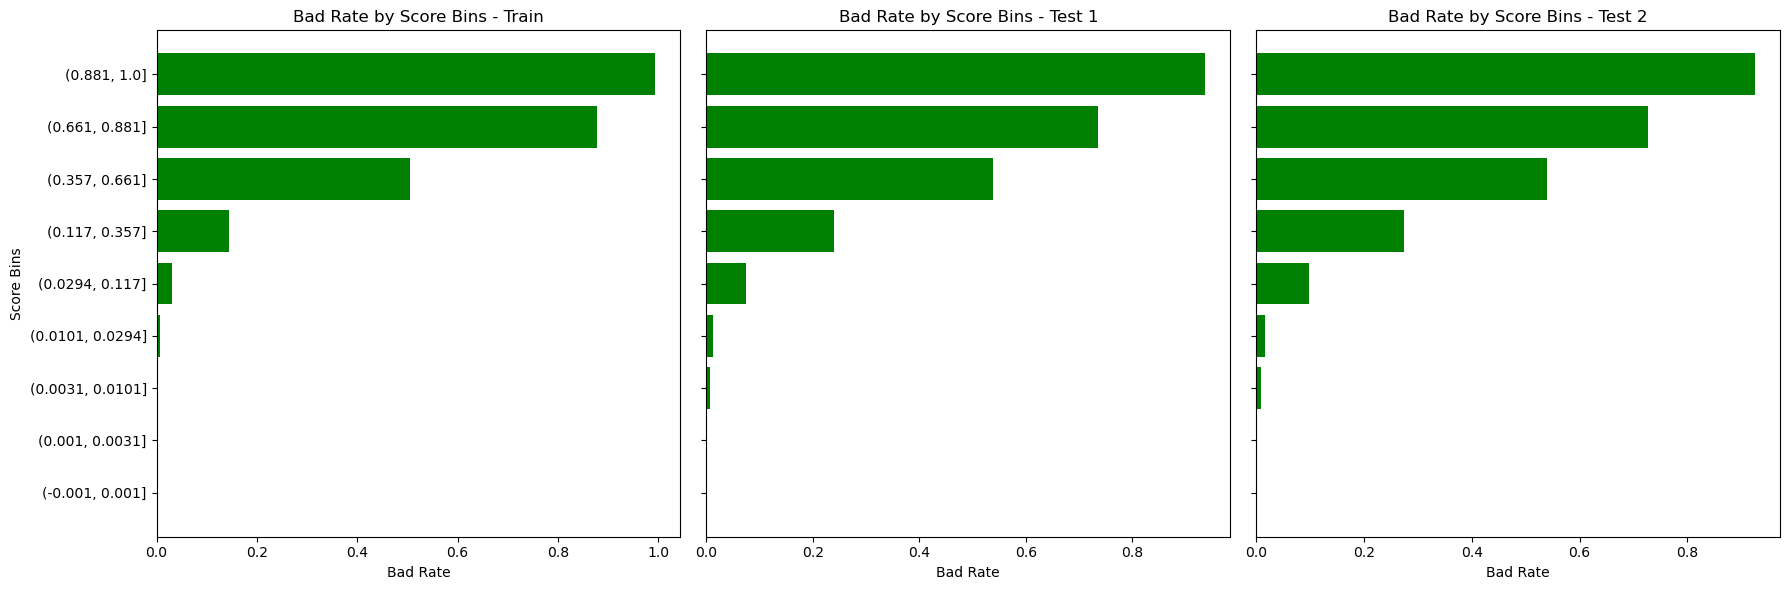

In [88]:
import matplotlib.pyplot as plt

# Define score bins based on the quantiles or specific cut-offs observed in your dataset
score_bins = [0, 0.001, 0.0031, 0.0101, 0.0294, 0.117, 0.357, 0.661, 0.881, 1]  # Adjust as needed

def calculate_bad_rate(data, score_column, target_column, bins):
    """
    Function to calculate bad (default) rate for each score bin.
    """
    # Creating a 'Score Bin' column in the data using the bins
    data['Score Bin'] = pd.cut(data[score_column], bins=bins, include_lowest=True)

    # Calculating the bad rate (mean of target column as bad rate) for each score bin
    bad_rate = data.groupby('Score Bin')[target_column].mean()

    return bad_rate

# Calculate bad rates for each dataset
train_bad_rate = calculate_bad_rate(train, 'Probability of Default', 'target', score_bins)
test1_bad_rate = calculate_bad_rate(test1, 'Probability of Default', 'target', score_bins)
test2_bad_rate = calculate_bad_rate(test2, 'Probability of Default', 'target', score_bins)

# Plotting bad rates by score bins for each dataset
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Train plot
axs[0].barh(train_bad_rate.index.astype(str), train_bad_rate.values, color='green')
axs[0].set_title("Bad Rate by Score Bins - Train")
axs[0].set_xlabel("Bad Rate")
axs[0].set_ylabel("Score Bins")

# Test 1 plot
axs[1].barh(test1_bad_rate.index.astype(str), test1_bad_rate.values, color='green')
axs[1].set_title("Bad Rate by Score Bins - Test 1")
axs[1].set_xlabel("Bad Rate")

# Test 2 plot
axs[2].barh(test2_bad_rate.index.astype(str), test2_bad_rate.values, color='green')
axs[2].set_title("Bad Rate by Score Bins - Test 2")
axs[2].set_xlabel("Bad Rate")

plt.tight_layout()
plt.show()


In [65]:
print(feature_importance_df.to_string(index=False))

Feature  Importance
    P_2    0.285704
    R_1    0.054427
    B_1    0.053767
    S_3    0.013212
   D_42    0.012122
   D_65    0.011216
   D_44    0.010784
    B_7    0.009952
   B_30    0.009449
    R_3    0.009009
    B_3    0.008734
   B_22    0.008477
   B_11    0.008398
  D_111    0.007700
   D_45    0.007591
    B_2    0.007561
   D_66    0.007238
   D_46    0.006904
    P_3    0.006530
   B_17    0.006439
   D_50    0.006139
  D_132    0.005977
    R_2    0.005905
    B_9    0.005874
    B_4    0.005697
  D_120    0.005470
   D_54    0.005389
   D_43    0.005276
   D_49    0.005270
   B_23    0.005186
 D_64_O    0.004931
   D_56    0.004849
   S_23    0.004557
    B_5    0.004527
   B_26    0.004484
   S_25    0.004380
   B_37    0.004186
  D_112    0.004159
D_63_XM    0.004141
    S_8    0.004041
   D_39    0.004035
  D_110    0.004035
   R_11    0.004015
   S_15    0.003936
   B_38    0.003870
   D_51    0.003623
   R_16    0.003532
    R_5    0.003463
    R_7    0.003327


In [66]:
feature_importance_df.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
0,P_2,0.285704
4,R_1,0.054427
2,B_1,0.053767
5,S_3,0.013212
8,D_42,0.012122
...,...,...
189,D_63_XL,0.000000
191,D_63_XZ,0.000000
192,D_64_-1,0.000000
107,D_88,0.000000


In [67]:
# Define the selected columns directly as strings
selected_columns = ['P_2', 'R_1', 'B_1', 'S_3', 'D_42']
percentiles_to_include = [0.01, 0.05, 0.95, 0.99]

# Generate summary statistics for selected columns with specified percentiles
slide_4 = final_data[selected_columns].describe(percentiles=percentiles_to_include)

# Calculate the percentage of missing values for each column
percent_missing = (final_data[selected_columns].isnull().mean() * 100).round(2)

# Add the 'Percent Missing' row to the summary DataFrame
slide_4.loc['Percent Missing'] = percent_missing

# Display the updated summary
print(slide_4)
slide_4.to_csv('D:/slide_4.csv')


                          P_2           R_1           B_1           S_3  \
count            91286.000000  9.178300e+04  91783.000000  80388.000000   
mean                 0.648542  8.051761e-02      0.126149      0.228912   
std                  0.236905  1.583736e-01      0.198083      0.167618   
min                 -0.264657  6.440720e-07     -0.267429     -0.294671   
1%                   0.063656  2.953357e-03      0.003876      0.022495   
5%                   0.237174  3.793518e-03      0.004897      0.071969   
50%                  0.678971  5.846429e-03      0.038603      0.173595   
95%                  0.965155  4.271814e-01      0.576072      0.561314   
99%                  0.999472  7.551469e-01      0.934474      0.890135   
max                  1.009965  1.754107e+00      1.323839      3.860899   
Percent Missing      0.540000  0.000000e+00      0.000000     12.420000   

                         D_42  
count            22553.000000  
mean                 0.181412  
std

In [68]:
# Ensure 'final_features' is a Series or a list of feature names
filtered_features = feature_importance_df[feature_importance_df['Feature'].isin(final_features)]


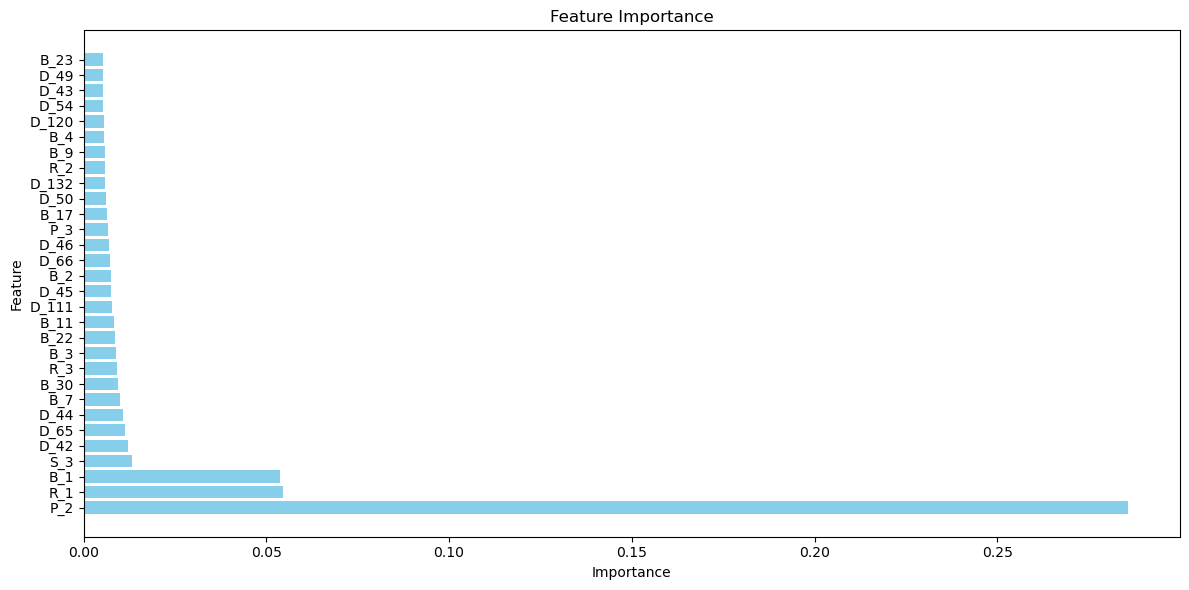

In [69]:


feature_names = filtered_features['Feature'].tolist()
importance_values = filtered_features['Importance'].tolist()

plt.figure(figsize=(12, 6)) # Adjust the figure size as needed
plt.barh(feature_names, importance_values, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()



In [70]:
feature_names = filtered_features['Feature'].tolist()
importance_values = filtered_features['Importance'].tolist()


In [71]:
importance_values

[0.2857036590576172,
 0.054426927119493484,
 0.05376670882105827,
 0.013212420046329498,
 0.012122495099902153,
 0.01121615618467331,
 0.010783675126731396,
 0.00995228998363018,
 0.009449204429984093,
 0.009008865803480148,
 0.00873438362032175,
 0.008476844988763332,
 0.008398404344916344,
 0.0076998756267130375,
 0.0075912391766905785,
 0.007561458740383387,
 0.0072375512681901455,
 0.006904120557010174,
 0.006529937963932753,
 0.006438710261136293,
 0.006138778757303953,
 0.005976920016109943,
 0.005904755555093288,
 0.005873508285731077,
 0.005697240587323904,
 0.005470271222293377,
 0.005388908553868532,
 0.005276235286146402,
 0.005270159337669611,
 0.005185607820749283]

In [72]:
filtered_features = feature_importance_df[feature_importance_df['Importance'] > 0.005]

filtered_features

,Feature,Importance
0,P_2,0.285704
4,R_1,0.054427
2,B_1,0.053767
5,S_3,0.013212
8,D_42,0.012122
51,D_65,0.011216
10,D_44,0.010784
20,B_7,0.009952
101,B_30,0.009449
25,R_3,0.009009


In [73]:
!pip install shap

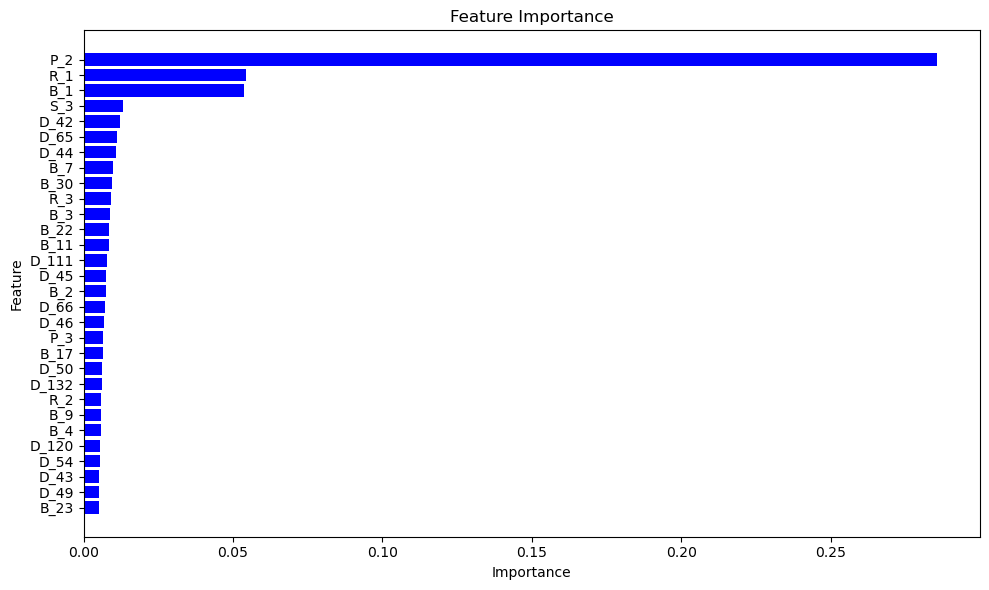

In [77]:
plt.figure(figsize=(10, 6))

# Sort the DataFrame by importance in ascending order (for top-down bar chart)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0.005]
feature_importance_df.sort_values("Importance", inplace=True, ascending=True)

plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], color="blue", align="center")
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show the plot
plt.tight_layout()
plt.show()

In [78]:
feature_importance_df['Feature']

69      B_23
18      D_49
9       D_43
33      D_54
157    D_120
11       B_4
24       B_9
14       R_2
171    D_132
22      D_50
53      B_17
27       P_3
15      D_46
56      D_66
3        B_2
12      D_45
145    D_111
31      B_11
64      B_22
7        B_3
25       R_3
101     B_30
20       B_7
10      D_44
51      D_65
8       D_42
5        S_3
2        B_1
4        R_1
0        P_2
Name: Feature, dtype: object

In [79]:
feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: x[0])


# counting the number of variables
S = sum(column.startswith('S') for column in feature_importance_df['Feature'])
D = sum(column.startswith('D') for column in feature_importance_df['Feature'])
P = sum(column.startswith('P') for column in feature_importance_df['Feature'])
B = sum(column.startswith('B') for column in feature_importance_df['Feature'])
R = sum(column.startswith('R') for column in feature_importance_df['Feature'])


selected_features = pd.DataFrame({'Variable Type': ['Spend', 'Delinquency','Payment',
                                            'Balance','Risk','Total'], 'Count': [S,D,P,B,R, 
                                                                                 S+D+P+B+R]})



print(selected_features)

selected_features.to_csv('D:/selected_features.csv')


  Variable Type  Count
0         Spend      1
1   Delinquency     13
2       Payment      2
3       Balance     11
4          Risk      3
5         Total     30


 99%|===================| 6821/6884 [00:42<00:00]        

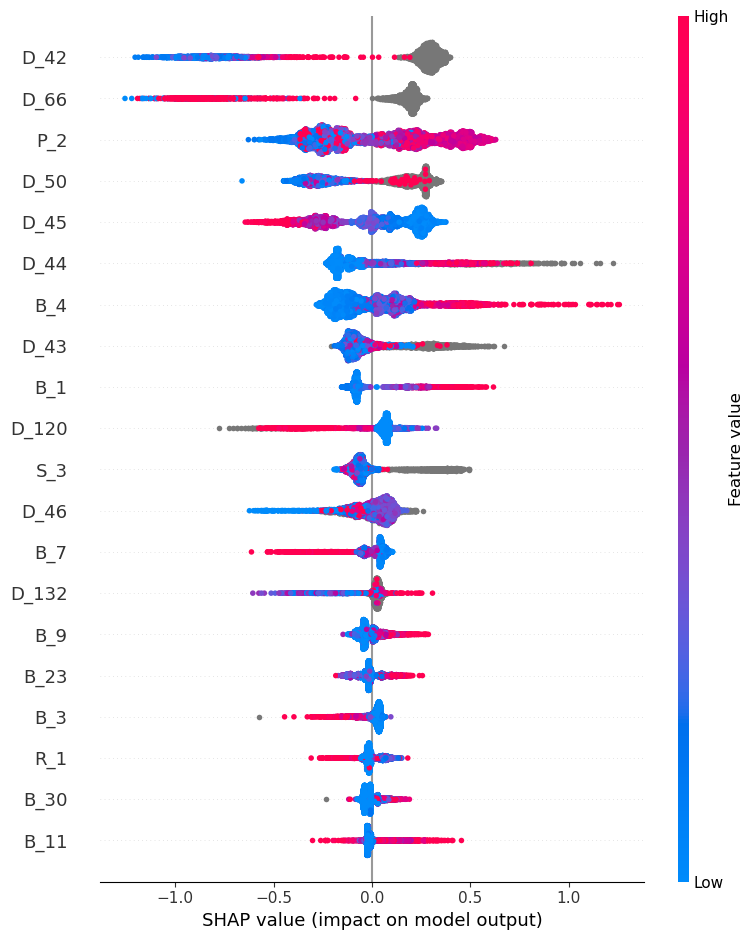

In [82]:
import shap
explainer = shap.Explainer(final_model, X_test2_OP)
shap_values = explainer(X_test2_OP)
shap.summary_plot(shap_values, X_test2_OP, feature_names = X_test2_OP.columns)

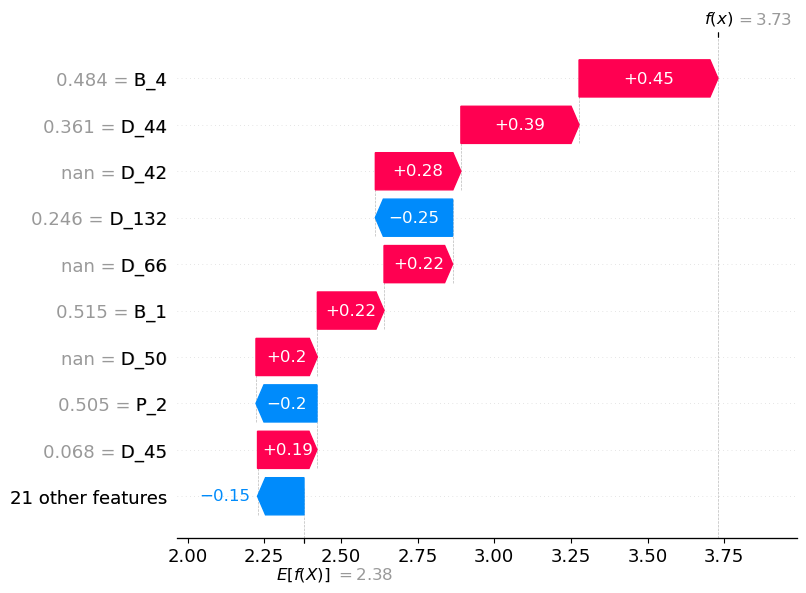

In [85]:
# Select the first observation from X_test2_OP
sample = X_test2_OP.iloc[0:1]

# Calculate SHAP values for the sample
shap_values_sample = explainer(sample)

# Create a waterfall plot for the sample
shap.waterfall_plot(shap_values_sample[0])
